# ***Final Project***
---

In this project, you will develop a convolutional neural network (CNN) to perform classification, and test it out on the CIFAR-10 dataset.


The given code is a simple implement for the CIFAR-10 classification. 

The goal of the final project is to check whether you understand important concepts for training CNN such as:

*   Network architecture
*   Optimization
*   Loss function
*   Data preprocessing
*   Regularization
*   ...

Therefore, you can **modify the given code to improve the performance** of the network **except for the dataset (i.e. trainset and testset)**.

You should **upload your code and your report** including an explaination of your code and what you have changed or added.

In [ ]:
# AS usual, a bit of setup
# If you need other libraries, you should import the libraries.

import os, sys
import torch
from torch import nn
from torch.nn import functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# **Data Loader**

You can load the CIFAR-10 dataset using the library `torchvision.datasets`

The details of CIFAR-10 dataset can be found in https://www.cs.toronto.edu/~kriz/cifar.html

`transforms_cifar10` is used to assemble several transforms for data preprossing.

In [4]:
#Set the batch size
_batch_size = 64

In [5]:
# Define the data augmentation transformations
train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Train dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=_batch_size, shuffle=True, num_workers=2)

# Test dataset
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=_batch_size, shuffle=False, num_workers=2)

# Classes of CIFAR-10 dataset
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


horse horse  frog  bird   dog   dog  frog  ship  bird   car truck  bird   cat  bird truck  ship  frog  deer horse   car truck   dog plane  ship   car  ship   cat  deer plane  bird   car  ship  ship horse   dog plane  frog   cat truck  ship truck truck  bird plane truck plane truck  frog   dog  frog plane horse   car  frog horse truck horse  ship  ship  bird   car  deer   car   cat


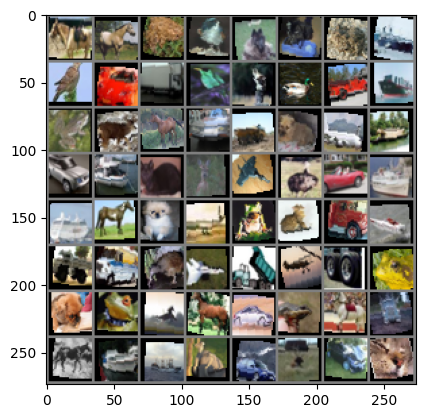

In [6]:
# Examples of dataset

def imshow(img):
  img = img /2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
imgs, labels = next(dataiter)

imshow(torchvision.utils.make_grid(imgs))
print(' '.join('%5s' % classes[labels[j]] for j in range(_batch_size)))

# **Your own CNN**

You can implement your own network using libraries such as `torch.nn`and `torch.nn.functional`.

`SimpleNet` and `VGG11` are examples to help your understand the implementation of the network.

So, you can modify the given codes or create another awesome neural network for CIFAR-10 classification.

In [7]:
from torchsummary import summary

#VGG16
cfg = {'VGG16' : [64,64, 'M', 128, 128, 'M', 256, 256,256, 'M', 512,512,512, 'M',512,512,512,'M']}

class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.features = self.make_layers(cfg['VGG16'])
        self.classifier = nn.Linear(512, 10)

    def make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU()]
                in_channels = x
        return nn.Sequential(*layers)


    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out


net = VGG16().cuda()

# Create a random input tensor on the GPU
input_shape = (3, 32, 32)
input_tensor = torch.randn(1, *input_shape).cuda()

# Print the summary of network
summary(net, input_shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

# **Loss function and optimizer**

Set the **loss function and optimizer** for training CNN.
You can modify the loss function or optimizer for better performance.

In [8]:
# Loss function and optimizer
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.00005)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

# **Train the network**

Train your own network using the above loss function and optimizer.

[Epoch - 1, Iteration -    64] Loss: 2.203
[Epoch - 1, Iteration -   128] Loss: 0.980
[Epoch - 1, Iteration -   192] Loss: 0.612
[Epoch - 1, Iteration -   256] Loss: 0.447
[Epoch - 1, Iteration -   320] Loss: 0.339
[Epoch - 1, Iteration -   384] Loss: 0.268
[Epoch - 1, Iteration -   448] Loss: 0.226
[Epoch - 1, Iteration -   512] Loss: 0.186
[Epoch - 1, Iteration -   576] Loss: 0.163
[Epoch - 1, Iteration -   640] Loss: 0.145
[Epoch - 1, Iteration -   704] Loss: 0.128
[Epoch - 1, Iteration -   768] Loss: 0.114
[Epoch - 1] Loss: 1.649
[Epoch - 2, Iteration -    64] Loss: 1.314
[Epoch - 2, Iteration -   128] Loss: 0.666
[Epoch - 2, Iteration -   192] Loss: 0.420
[Epoch - 2, Iteration -   256] Loss: 0.302
[Epoch - 2, Iteration -   320] Loss: 0.251
[Epoch - 2, Iteration -   384] Loss: 0.200
[Epoch - 2, Iteration -   448] Loss: 0.162
[Epoch - 2, Iteration -   512] Loss: 0.143
[Epoch - 2, Iteration -   576] Loss: 0.127
[Epoch - 2, Iteration -   640] Loss: 0.113
[Epoch - 2, Iteration -   704]

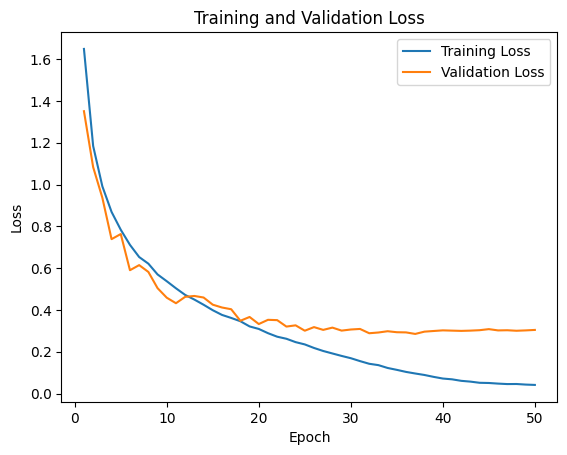

Finished Training


In [9]:
epochs = 50  # number of epochs
train_loss = []  # to store training loss
val_loss = []  # to store validation loss

for epoch in range(epochs):
    loss_tmp = 0.0
    epoch_loss = 0.0
    running_loss = 0.0
  
    for i, data in enumerate(trainloader, start=0):
        # Load the data
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Estimate the output using the network
        outputs = net(inputs)

        # Calculate the loss between the output of the network and label
        loss = loss_fun(outputs, labels)

        # Optimize the network 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_tmp += loss.item()
        epoch_loss += loss.item()

        if i % _batch_size == _batch_size-1:    # Print loss every mini-batches
            print('[Epoch - %d, Iteration - %5d] Loss: %.3f' %(epoch + 1, i + 1, loss_tmp / (i+1)))
            loss_tmp = 0.0

    # Update the learning rate according to the learning rate scheduler
    scheduler.step()

    # Print the epoch loss
    print('[Epoch - %d] Loss: %.3f' %(epoch + 1, epoch_loss / (i+1)))
    train_loss.append(epoch_loss / (i+1))

    # Compute validation loss
    net.eval()  # Set the model to evaluation mode
    val_loss_tmp = 0.0
    
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = net(inputs)
            val_loss_batch = loss_fun(outputs, labels)
            val_loss_tmp += val_loss_batch.item()

    avg_val_loss = val_loss_tmp / len(testloader)
    val_loss.append(avg_val_loss)
    
    net.train()  # Set the model back to training mode

# Plotting the graph
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print('Finished Training')

# **Test the network**

Test the trained network using the testset.

Accuracy of the network on the 10,000 test images is the final accuracy of your network. 

The closer the accuray is to 100%, the better the network classifies the input image.

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship plane   cat  ship  ship horse horse  deer  frog horse   cat  frog   cat
Predicted:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship   cat   cat  ship  ship horse   dog   dog   cat horse   dog  frog   cat


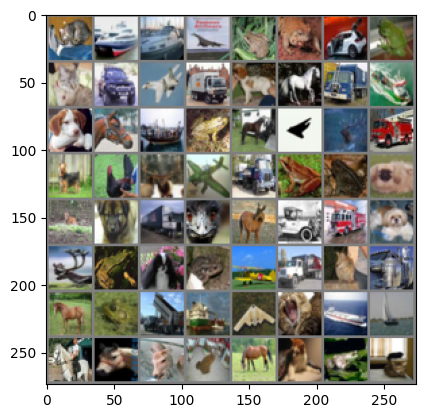

In [10]:
# Test the trained model with sample
net.eval()
dataiter_test = iter(testloader)
img_test, labels_test = next(dataiter_test)

imshow(torchvision.utils.make_grid(img_test))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_test[j]] for j in range(_batch_size)))

img_test = img_test.to(device)
labels_test = labels_test.to(device)

# Prediction
outputs_test = net(img_test)
_, predicted = torch.max(outputs_test.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(_batch_size)))

In [13]:
# Test the trained model with overall test dataset

correct = 0
total = 0
with torch.no_grad():
  net.eval() #do not use the dropout at test time
  for data in testloader:
    # Load the data
    inputs_test, labels_test = data
    inputs_test = inputs_test.to(device)
    labels_test = labels_test.to(device)

    # Estimate the output using the trained network
    outputs_test = net(inputs_test)
    _, predicted = torch.max(outputs_test.data, 1)
   
    # Calculate the accuracy
    total += labels_test.size(0)
    correct += (predicted == labels_test).sum()

# Final accuracy
print('Accuracy of the network on the 10,000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10,000 test images: 92.28 %
